In [13]:
import numpy as np
events_reconst =np.load('/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/events_np/train/bird/user00_indoor_0.npz')
print(events_reconst['t'][0]*1e-6,events_reconst['t'][-1]*1e-6)

2365.205212 2369.949438


In [14]:
import torch
torch.load('/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/my_rpg_e2vid/pretrained/E2VID_lightweight.pth.tar',map_location=torch.device('cpu'))

{'arch': 'E2VIDRecurrent',
 'state_dict': OrderedDict([('unetrecurrent.head.conv2d.weight',
               tensor([[[[ 4.8940e-03, -3.7562e-03, -1.8128e-02,  7.8718e-03,  2.9026e-03],
                         [ 3.7071e-03, -1.0144e-02,  1.9055e-02,  6.5492e-04, -1.0003e-03],
                         [-8.8461e-03,  5.2913e-03,  1.3677e-02,  2.2432e-02,  6.4362e-03],
                         [ 3.7390e-03, -1.5376e-02,  3.7861e-03, -6.8255e-04, -6.5604e-03],
                         [-5.1271e-03,  3.7230e-03, -5.6028e-03, -4.6254e-03,  9.7632e-03]],
               
                        [[ 1.2630e-02, -7.7619e-03,  1.0111e-02, -1.2275e-02,  1.3180e-02],
                         [-6.4551e-03, -7.0887e-03, -2.5586e-02, -1.2795e-02,  1.7471e-03],
                         [-1.1207e-02, -1.2288e-02,  3.6775e-02, -2.5593e-02, -1.2200e-02],
                         [ 3.8682e-03, -6.5174e-03, -2.4027e-02, -1.1648e-02, -5.7583e-03],
                         [ 1.3809e-02, -8.9435e-03,  8.0294e-03

In [1]:
import numpy as np
import torch
import random
seed = 310
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.mps.deterministic = True
torch.backends.cuda.deterministic = True
np.random.randn(2)

array([0.5353452 , 1.01156325])

In [8]:
from Laboratory import randnumber
randnumber()

array([0.5353452 , 1.01156325])

In [3]:
import numpy as np
import os
root_np = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/events_np/train/arm crossing/chenjieneng_1.1.npz'
data_name_root = root_np
for n in range(4):
    data_name_root = os.path.dirname(data_name_root)
#print(data_name_root)
events_dict = np.load(root_np)
times_us = events_dict['t'].astype(np.float32)
duration_us = (times_us[-1]-times_us[0])/22 #50ms that is equa l to 50*1e3 us
total_event_list = np.array([[t,x,y,pol] for t,x,y,pol in zip(times_us,events_dict['x'],events_dict['y'],events_dict['p'])],dtype=np.float32)
last_stamp = times_us[0]
mask = np.logical_and(times_us >= last_stamp,times_us < (last_stamp + duration_us))
print(total_event_list[mask].dtype)

float32


In [18]:
import numpy as np
k = np.load('/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/frames_num26_splitby_exp_decay_tau0_8_scale50/train/arm crossing/chenjieneng_1.1.npz')
print(k.shape)

AttributeError: 'NpzFile' object has no attribute 'shape'

In [3]:
import torch
from my_rpg_e2vid.utils.inference_utils import events_to_voxel_grid_pytorch
device = torch.device('mps')
k = events_to_voxel_grid_pytorch(total_event_list,20,346,260,device)

In [11]:
from my_rpg_e2vid.utils.event_readers import MyFixedDurationEventReader
wind_iterator = MyFixedDurationEventReader(root_np,time_steps=22)
for i,wind in enumerate(wind_iterator):
    print(i)
    if i == 21:
        #print(np.all(wind == total_event_list[mask]))
        k = wind[-1]

Will use fixed duration event windows of size 245201454.55 ms
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [10]:
print(len(total_event_list)/len(total_event_list[mask]))

124.72688787185355


In [21]:
from utils import loading_data
import os
src_root = os.getcwd()
data_root = os.path.join(os.path.dirname(src_root),'data')
data_animals = os.path.join(data_root,'DVS_Animals_Dataset')
data_gesture = os.path.join(data_root,'DVS_Gesture_dataset')
data_dailyactions = os.path.join(data_root,'DVS_DailyAction_dataset')
data_actrec = os.path.join(data_root,'DVS_ActionRecog_dataset')
#train, test ,_,_  = loading_data(input_data=data_actrec,time_step = 16,splitmeth = 'number')
#train2, test2 ,_,_  = loading_data(input_data=data_actrec,time_step = 16,splitmeth = 'time')
train3, test3 ,_,_  = loading_data(input_data=data_animals,time_step = 13, splitmeth = 'exp_decay')
train3, test3 ,_,_  = loading_data(input_data=data_animals,time_step = 16, splitmeth = 'exp_decay')
train3, test3 ,_,_  = loading_data(input_data=data_animals,time_step = 22, splitmeth = 'exp_decay')

The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/frames_num13_splitby_exp_decay_tau0_8_scale50] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/frames_num13_splitby_exp_decay_tau0_8_scale50] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/frames_num16_splitby_exp_decay_tau0_8_scale50] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/frames_num16_splitby_exp_decay_tau0_8_scale50] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/frames_num22_splitby_exp_decay_tau0_8_scale50] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/frames_num22_splitby_exp_decay_tau0_8_scale50] already exists.


In [2]:
train4, _ ,_,_  = loading_data(input_data=AR_file,time_step = 25,splitmeth = 'exp_decay')

232 232 232
59 59 59


In [4]:
print(len(train),len(train2),len(train3))
print(len(test),len(test2),len(test3))

232 232 232
59 59 59


In [3]:
print(len(train),len(train2),len(train3),len(train4))#Lo ideal es que salga 235

233 230 235 231


In [4]:
train[0]

(array([[[[16., 29., 44., ..., 23.,  0.,  0.],
          [ 0.,  0., 34., ...,  0.,  0.,  0.],
          [42., 35., 47., ...,  0.,  0.,  0.],
          ...,
          [39.,  0., 43., ...,  0., 49.,  0.],
          [ 0., 23., 44., ...,  0.,  0.,  0.],
          [45.,  0.,  0., ...,  0., 49., 25.]],
 
         [[16., 49., 43., ..., 24.,  0.,  0.],
          [ 0.,  0., 34., ...,  0.,  0.,  0.],
          [38., 32., 48., ...,  0.,  0.,  0.],
          ...,
          [38.,  0., 42., ...,  0., 46.,  0.],
          [ 0., 22., 43., ...,  0.,  0.,  0.],
          [38.,  0.,  0., ...,  0., 48., 25.]]],
 
 
        [[[ 4., 43., 31., ...,  6.,  0.,  0.],
          [18., 17., 45., ..., 24.,  0.,  0.],
          [46., 36., 49., ...,  0.,  0.,  0.],
          ...,
          [11.,  0., 39., ...,  0., 23.,  0.],
          [ 0., 30., 12., ...,  0., 33.,  0.],
          [37.,  0.,  0., ...,  0., 14.,  7.]],
 
         [[ 4., 49., 30., ...,  7.,  0.,  0.],
          [18., 16., 44., ...,  0.,  0.,  0.],
   

In [5]:
from spikingjelly.datasets import play_frame
import os
root_gifs = os.path.join(os.getcwd(),'gifs_ActRec_label0_timedecay_tau0_8_scale50')
os.mkdir(root_gifs)

k = 0
for file in train:
    if file[1] == 0:
        play_frame(file[0],save_gif_to=os.path.join(root_gifs,f'data_{k}.gif'))
        k += 1
    if k==29:
        break

FileExistsError: [Errno 17] File exists: '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_ActRec_label0_timedecay_tau0_8_scale50'

In [ ]:
print((events_f2['t'][-1] - events_f2['t'][0])/26)
events_f2['t'].size

202326.65384615384


/var/folders/ws/h7295dnd2171nw3lr_bkwk380000gn/T/ipykernel_27508/3240113372.py:1: RuntimeWarning: overflow encountered in scalar subtract
  print((events_f2['t'][-1] - events_f2['t'][0])/26)


1055671

In [5]:
import numpy as np
prev_samp = events_f2['t'][:-1]
next_samp = events_f2['t'][1:]
up_down = np.where(prev_samp>=next_samp,1,0)
print(np.sum(up_down == 1 ))
print(np.sum(up_down == 0))


32796
536063


In [15]:
4293097006 - 3390203

4289706803

In [5]:
events_f1['t'].min(),events_f1['t'].max()

(15472394, 15491516)

In [6]:
events_f2['t'][-1].astype('uint32')-events_f2['t'][0].astype('uint32')

/var/folders/ws/h7295dnd2171nw3lr_bkwk380000gn/T/ipykernel_29349/1170862811.py:1: RuntimeWarning: overflow encountered in scalar subtract
  events_f2['t'][-1].astype('uint32')-events_f2['t'][0].astype('uint32')


5260493

In [11]:
fail2[-1]-fail2[0]

5948746

In [7]:
fail2 = events_f2['t']
print(fail2[0],fail2[-1])

50133294 56082040


In [5]:
import os
import numpy as np
from event_integration_to_frame import myintegrate_events_by_fixed_frames_number
from spikingjelly.datasets import integrate_events_by_fixed_frames_number, play_frame, integrate_events_segment_to_frame
fine = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/events_np/train/kicking/chenjieneng_3.1.npz'
fail_1 = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/events_np/train/picking up/zhangliming_4.2.npz'
fail_2 = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/events_np/train/arm crossing/miaoshu_1.3.npz'
events_fine = np.load(fine)
events_f1 = np.load(fail_1)
events_f2 = np.load(fail_2)
#events_f3 = np.load(fail_3)
print(events_f2['x'])
#k_fine = integrate_events_by_fixed_frames_number(events = events_fine,split_by = 'time', frames_num = 26, H = 260, W = 346)
k1_number = myintegrate_events_by_fixed_frames_number(events = events_f1,split_by = 'number', frames_num = 10, H = 260, W = 346)
#k1 = integrate_events_by_fixed_frames_number(events = events_f1,split_by = 'time', frames_num = 16, H = 260, W = 346)
k2 = myintegrate_events_by_fixed_frames_number(events = events_f1,split_by = 'time', frames_num = 26, H = 260, W = 346)
print(np.all(k1==k2))
#k = myintegrate_events_by_fixed_frames_number(events = events_f2,split_by='exp_decay', frames_num = 26, H = 260, W = 346, factor_tau = 0.8, scale_factor = 50)
#print(k.shape)
#integrate_events_by_fixed_frames_number_bydecay(events = events_DA, frames_num = 26, H = 128, W = 128, factor_tau = 0.8, scale_factor = 50)

[130 194  36 ...   5  51  21]
t_0: 184832359, t_fin: 190679232
 t_i:  184832359, t_fi: 185057238  False
 t_i:  185057238, t_fi: 185282117  False
 t_i:  185282117, t_fi: 185506996  False
 t_i:  185506996, t_fi: 185731875  False
 t_i:  185731875, t_fi: 185956754  False
 t_i:  185956754, t_fi: 186181633  False
 t_i:  186181633, t_fi: 186406512  False
 t_i:  186406512, t_fi: 186631391  False
 t_i:  186631391, t_fi: 186856270  False
 t_i:  186856270, t_fi: 187081149  False
 t_i:  187081149, t_fi: 187306028  False
 t_i:  187306028, t_fi: 187530907  False
 t_i:  187530907, t_fi: 187755786  False
 t_i:  187755786, t_fi: 187980665  False
 t_i:  187980665, t_fi: 188205544  False
 t_i:  188205544, t_fi: 188430423  False
 t_i:  188430423, t_fi: 188655302  False
 t_i:  188655302, t_fi: 188880181  False
 t_i:  188880181, t_fi: 189105060  False
 t_i:  189105060, t_fi: 189329939  True
 t_i:  189329939, t_fi: 189554818  True
 t_i:  189554818, t_fi: 189779697  True
 t_i:  189779697, t_fi: 190004576  Fal

/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/event_integration_to_frame.py:58: UserWarning: Detected a time step with no events within.
  warnings.warn('Detected a time step with no events within.',UserWarning)
/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/event_integration_to_frame.py:58: UserWarning: Detected a time step with no events within.
  warnings.warn('Detected a time step with no events within.',UserWarning)
/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/event_integration_to_frame.py:58: UserWarning: Detected a time step with no events within.
  warnings.warn('Detected a time step with no events within.',UserWarning)
/var/folders/ws/h7295dnd2171nw3lr_bkwk380000gn/T/ipykernel_39401/3753421159.py:17: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(np.all(k1==k2))


In [6]:
from spikingjelly.datasets import integrate_events_by_fixed_frames_number, play_frame, integrate_events_segment_to_frame
play_frame(x = k2,save_gif_to = os.path.join(os.getcwd(),'pruebaaaa2_time.gif'))

Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/pruebaaaa2_time.gif].


In [21]:
from spikingjelly.datasets import integrate_events_by_fixed_frames_number, play_frame, integrate_events_segment_to_frame
p = integrate_events_segment_to_frame(events_f2['x'],events_f2['y'],events_f2['p'], H = 260, W = 346, j_l = 54, j_r = 54)
print(np.all(p==0))

True


In [22]:
p = np.array([3,4,5])
len(p[np.array([False,False,False])])

0

In [ ]:
import numpy as np
from event_integration_to_frame import integrate_events_by_fixed_frames_number_bydecay
DailyAct_np_file = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/events_np/train/climb/cc2112.npz'
ActRec_npfile = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/events_np/train/arm crossing/chenjieneng_1.1.npz'
events_AR = np.load(ActRec_npfile)
events_DA = np.load(DailyAct_np_file)
integrate_events_by_fixed_frames_number_bydecay(events = events_AR, frames_num = 26, H = 260, W = 346, factor_tau = 0.8, scale_factor = 50)
#integrate_events_by_fixed_frames_number_bydecay(events = events_DA, frames_num = 26, H = 128, W = 128, factor_tau = 0.8, scale_factor = 50)

array([[[[16, 29, 44, ..., 23,  0,  0],
         [ 0,  0, 34, ...,  0,  0,  0],
         [42, 35, 47, ...,  0,  0,  0],
         ...,
         [39,  0, 43, ...,  0, 49,  0],
         [ 0, 23, 44, ...,  0,  0,  0],
         [45,  0,  0, ...,  0, 49, 25]],

        [[16, 49, 43, ..., 24,  0,  0],
         [ 0,  0, 34, ...,  0,  0,  0],
         [38, 32, 48, ...,  0,  0,  0],
         ...,
         [38,  0, 42, ...,  0, 46,  0],
         [ 0, 22, 43, ...,  0,  0,  0],
         [38,  0,  0, ...,  0, 48, 25]]],


       [[[ 4, 43, 31, ...,  6,  0,  0],
         [18, 17, 45, ..., 24,  0,  0],
         [46, 36, 49, ...,  0,  0,  0],
         ...,
         [11,  0, 39, ...,  0, 23,  0],
         [ 0, 30, 12, ...,  0, 33,  0],
         [37,  0,  0, ...,  0, 14,  7]],

        [[ 4, 49, 30, ...,  7,  0,  0],
         [18, 16, 44, ...,  0,  0,  0],
         [47, 34, 48, ...,  0,  0,  0],
         ...,
         [11,  0, 37, ...,  0, 22,  0],
         [ 0, 32, 12, ...,  0, 41,  0],
         [36,  0

In [ ]:
t = np.array([4])
t = t.astype('uint32')
t = (t*1e-4).astype('uint32')

In [ ]:
events_DA['t']#.astype('uint32')

array([593159078, 593167417, 593167774, ..., 597054624, 597054710,
       597054729], dtype=uint32)

In [ ]:
import numpy as np
np.mean(results['hola'])

4.0

In [ ]:
from Laboratory import loading_data
data_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset'
data_set, n_classes, sizexy = loading_data(input_data=data_dir,tr_tst_split=False)

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.


In [ ]:
import numpy as np

In [ ]:
X  = [None]*len(data_set)
y = [None]*len(data_set)
for i,(sample,label) in enumerate(data_set):
    X[i] = sample
    y[i] = label
X = np.array(X)
y = np.array(y)

In [ ]:
X  = np.array([])
y = np.array([])
for sample,label in data_set:
    try:
        X = np.concatenate((X,sample))
        y = np.concatenate((y,sample))
    except:
        X = sample
        y = label

In [ ]:
X_1  = []
y_1 = []
for (sample,label) in (data_set):
    X_1.append(sample)
    y_1.append(label)
print(X_1[0].shape)

(16, 2, 128, 128)


In [ ]:
import torch

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf5 = StratifiedKFold(n_splits=5,shuffle=True,random_state=30)
labels = [sample[1] for sample in data_set]
for train_idx,test_idx in skf5.split(data_set, y = labels):
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_idx)
    trainloader = torch.utils.data.DataLoader(
                      data_set, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      data_set,
                      batch_size=10, sampler=test_subsampler)
    y_0_train = 0 
    for frame,label in trainloader:
        y_0_train += torch.sum(label ==0)
    y_0_test = 0 
    for frame,label in testloader:
        y_0_test += torch.sum(label ==0)  
    print(y_0_train,y_0_test)


tensor(96) tensor(25)
tensor(97) tensor(24)
tensor(97) tensor(24)
tensor(97) tensor(24)
tensor(97) tensor(24)


In [ ]:
import torch
gpu = False
device = ("cuda" if torch.cuda.is_available() else 'mps' if gpu else 'cpu')
print(device)

cpu


In [ ]:
import os 
import numpy as np
root_bend_data = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/extract/DailyAction/bend'
subjects = np.unique([file[:2] for file in os.listdir(root_bend_data) if file.endswith('.aedat')],return_counts=True)
print(subjects)

(array(['cc', 'gh', 'hk', 'hr', 'jc', 'jf', 'kx', 'ls', 'ps', 'sh', 'sy',
       'xc', 'xd', 'yn'], dtype='<U2'), array([ 6, 12, 12,  6,  6,  7,  6,  6, 12,  6,  6, 11, 18,  6]))


In [ ]:
import os 
import numpy as np
root = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset/events_np/train'
events_list = []
labels = sorted(it.name for it in os.scandir(root) if it.is_dir())
print(labels)
for i,label in enumerate(labels):
    label_subfolder = os.path.join(root,label)
    for file in os.listdir(label_subfolder):
        if file.endswith('.npz'):
            root_file = os.path.join(label_subfolder,file)
            events_list.append((np.load(root_file),i))
print(events_list)

['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']
[(<numpy.lib.npyio.NpzFile object at 0x291b53dd0>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e5b590>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e5b610>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e5b750>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e5ba10>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e59810>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e59d90>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e5bc50>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e5a290>, 0), (<numpy.lib.npyio.NpzFile object at 0x291e5ac10>, 0), (<numpy.lib.npyio.NpzFile object at 0x107ab82d0>, 0), (<numpy.lib.npyio.NpzFile object at 0x291b42890>, 0), (<numpy.lib.npyio.NpzFile object at 0x291b42c50>, 0), (<numpy.lib.npyio.NpzFile object at 0x291b41b90>, 0), (<numpy.lib.npyio.NpzFile object at 0x291b42d10>, 0), (<numpy.lib.npyio.NpzFile object at 0x291b5cf90>, 0), (<numpy.lib.npyio.NpzFile object at 0x291b5e590>, 0), (<numpy.lib.npyio.NpzFil

In [ ]:
events_list[0][0]['t']

array([46731035, 46731061, 46731069, ..., 50827498, 50827509, 50827533])

In [ ]:
dir(events_list[0][0])

['__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_files',
 'allow_pickle',
 'close',
 'f',
 'fid',
 'files',
 'get',
 'items',
 'keys',
 'max_header_size',
 'pickle_kwargs',
 'values',
 'zip']

# Experimento 1
Usando la red de spiking_jelly, es decir, DVSGesture_net probar su rendimiento en distintos datasets.


In [ ]:
import torch
cuda_available = torch.cuda.is_available()
print(cuda_available)

True


In [ ]:
import wandb

api = wandb.Api()

"""
username = wandb.run.entity
project = wandb.run.project
run_id = wandb.run.id
"""
run = api.run(f'tfm_datcom/Experimento1/ujyp55ue')
run.summary['max_test_acc'] = 0.5382 
run.update()

In [ ]:
if run.config['architecture']=='DVS_SNN':
    run.config['architecture'] = 'DVSG_net'
    print('Changes done')
    run.update()


Changes done


In [ ]:
import os
from sklearn.model_selection import train_test_split
end_files = '.aedat'
aedat_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/extract/Animals/'
aedats_list = [file for file in os.listdir(aedat_dir) if file.endswith(end_files)]
sublabels_list = [file.split('_')[1] for file in aedats_list] 
train, test = train_test_split(aedats_list,stratify=sublabels_list,test_size=0.2)
print(len(train),len(test))

47 12


In [ ]:
import numpy as np
root = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset'
labeldef_root = os.path.join(root,'extract','SL-Animals-DVS_gestures_definitions.csv')
labels_load = np.loadtxt(labeldef_root,dtype=str,delimiter=',',skiprows=1)
labels_defs = dict()
for label in labels_load:
    labels_defs[label[1]] = int(label[0]) - 1
list(labels_defs.keys())

['cat',
 'dog',
 'camel',
 'cow',
 'sheep',
 'goat',
 'wolf',
 'squirrel',
 'mouse',
 'dolphin',
 'shark',
 'lion',
 'monkey',
 'snake',
 'spider',
 'butterfly',
 'bird',
 'duck',
 'zebra']

In [ ]:
from Laboratory import loading_data
root_animals = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset'
root_dailyactions = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset'

data,_,_ = loading_data(root_dailyactions,tr_tst_split=False)

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_number_16_split_by_number] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_number_16_split_by_number] already exists.


In [ ]:
import numpy as np
k = np.load('/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/events_np/train/butterfly/user01_indoor_0.npz')

In [ ]:
np.array(pyx)[posic]

array([[ 0,  0,  1],
       [ 0,  1,  2],
       [ 1,  1,  2],
       [ 1,  3,  4],
       [ 1,  8, 23],
       [ 1,  9,  2]])

0 0 1 1
0 1 2 0
1 1 2 3
1 3 4 4
1 8 23 7
1 9 2 8


In [ ]:
for p,y,x in uniq_values:
    print(p,y,x)

0 0 1
0 1 2
1 1 2
1 3 4
1 8 23
1 9 2


In [ ]:
import numpy as np
x = np.array([2,1,4,2,4,12,2,12,2])
y = np.array([1,0,3,1,3,8,9,8,9])
p = np.array([0,0,1,1,1,1,1,1,1])
print('Tamaño: ',len(x))
t = np.array([1,3,8,12,24,36,40,45,50])
#pyx = [(p_,y_,x_) for x_,y_,p_ in zip(x,y,p)]
#print('Array de valores xy: ',xy)
#print(np.unique(xy,axis=0))
#uniq_values, posic_inverted = np.unique(pyx[::-1],axis=0,return_index=True)
uniq_values, posic_inverted = np.unique(list(zip(x,y,p))[::-1],axis=0,return_index=True)
posic = len(x) - posic_inverted - 1
print('Unique values: ',uniq_values)
print('index_of values: ', posic)
print('X from unique values:',x_uniq)
print(uniq_values.shape)

Tamaño:  9
Unique values:  [[ 1  0  0]
 [ 2  1  0]
 [ 2  1  1]
 [ 2  9  1]
 [ 4  3  1]
 [12  8  1]]
index_of values:  [1 0 3 8 4 7]
X from unique values: [0 0 1 1 1 1]
(6, 3)


In [ ]:
x_uniq,y_uniq,z_uniq = uniq_values[:,0],uniq_values[:,1],uniq_values[:,2]
matriz = np.zeros((14,14,14),dtype=np.int64)
matriz[x_uniq,y_uniq,z_uniq] = t[posic]
print(matriz[2,9,1])

50


In [ ]:
l = np.array([2,1,4,2,5,23])
l_0 = 30
tau = 14
print(np.exp((l-l_0)/tau))
outputs = []
for l_i in l:
    outputs.append( np.e**((l_i-l_0)/tau) )
print(np.array(outputs))


[0.13533528 0.12600565 0.15611805 0.13533528 0.16767725 0.60653066]
[0.13533528 0.12600565 0.15611805 0.13533528 0.16767725 0.60653066]


In [ ]:
(k['t'][-1] - k['t'][0])*1e-6

4.421317999999999

In [ ]:
train_set = DVSDailyActions(root = root_dailyactions,train = True, data_type = 'frame', frames_number = 16, split_by = 'number') 

The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_number_16_split_by_number] already exists.


# Data Augmentation

In [ ]:
from Datasets import DVSDailyActions
import numpy as np
import torch
from data_augmentation import rand_bbox,GMM_mask, EventMix, mySaltAndPepperNoise
root_dailyactions = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset'
data = DVSDailyActions(root = root_dailyactions,train = True, data_type = 'frame', frames_number = 16,split_by='exp_decay',factor_tau = 0.8,scale_factor=50)
data_augmented = EventMix(dataset=data,num_class = len(data.classes),num_mix = 1,
                             beta = 1, prob = 0.5, noise = 0, gaussian_n = 3) 

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_num16_splitby_exp_decay_tau0_8_scale50] already exists.
New version2
0.5 3 1


In [ ]:
l = data_augmented[4]
m = data_augmented[4]
print(l[1],'   ',m[1])
np.all(l[0] == m[0])

tensor([0.1181, 0.0000, 0.8819, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000])     tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


False

In [ ]:
import random
seed = 310
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.mps.deterministic = True
torch.backends.cuda.deterministic = True

data_aug_loader = torch.utils.data.DataLoader(
            dataset = data_augmented,
            batch_size = 8,
            shuffle = True,
            drop_last = True,
            num_workers = 4,
            pin_memory = True
        )
frame_0 = list()
for epoch in range(2):
    for i,(frame,label) in enumerate(data_aug_loader):
        if i==0:
            frame_0.append(frame)
        else:
            break

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [ ]:
frame_0[0].shape

torch.Size([8, 16, 2, 128, 128])

In [ ]:
label_onehot.shape

torch.Size([8, 12])

In [ ]:
import torch
import torch.nn.functional as F
label = torch.tensor([ 3,  3, 10,  9,  2,  8,  0,  9])
label_onehot = F.one_hot(label,len(data.classes)).float()
print(label_onehot)

train_data_loader = torch.utils.data.DataLoader(
            dataset=data_augmented,
            batch_size=8,
            shuffle=True,
            drop_last=True,
            num_workers=4,
            pin_memory=True
        )

tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])


In [ ]:
data[0][0]

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ..., 

In [ ]:
for i,(frame,label) in enumerate(train_data_loader):
    if i<5:
        print(label)
    else:
        break

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5243, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.4757, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.9764, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0236, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0000, 0.0000, 0.0000]])
tensor([[0.0000, 0.3116, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [ ]:
import random
idx_data = list(range(len(data)))
random.sample(idx_data,4)

[668, 421, 730, 22]

In [ ]:
k = [data[n] for n in range(4)]

In [ ]:
from torch.utils.data import ConcatDataset

data_new = ConcatDataset([data_augmented,k])

[39751 39717 40037 40040 40213 40224 39949 40114 39958 39997]


(array([39751., 39717., 40037., 40040., 40213., 40224., 39949., 40114.,
        39958., 39997.]),
 array([1.88279972e-06, 1.00001588e-01, 2.00001294e-01, 3.00000999e-01,
        4.00000705e-01, 5.00000410e-01, 6.00000115e-01, 6.99999821e-01,
        7.99999526e-01, 8.99999232e-01, 9.99998937e-01]),
 <BarContainer object of 10 artists>)

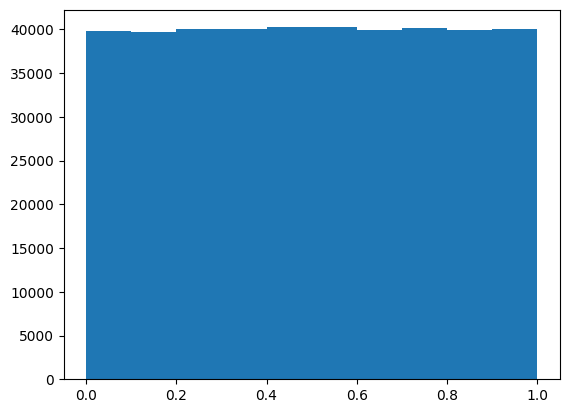

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
samples = np.random.rand(400000)
hist, bins = np.histogram(samples)
print(hist)
plt.hist(samples,bins = bins)

In [ ]:
data_augmented = 3!=2

In [ ]:
if torch.all(label[2,3:5] == label[2,3:5]):
    print('hola')

hola


In [ ]:
for n in label:
    print(n.max())


tensor(1.)
tensor(1.)
tensor(1.)
tensor(0.5454)
tensor(0.7658)
tensor(0.7840)
tensor(0.9977)
tensor(1.)


In [ ]:
_, pred_indices= label.topk(k=2,dim=1)
_, indices = label.topk(k=2,dim=1)
correct = ((pred_indices[:] == indices[:]))
correct

tensor([[True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True]])

In [ ]:
label.topk(k=2,dim=1)


torch.return_types.topk(
values=tensor([[1.0000, 0.0000],
        [1.0000, 0.0000],
        [1.0000, 0.0000],
        [0.5454, 0.4546],
        [0.7658, 0.2342],
        [0.7840, 0.2160],
        [0.9977, 0.0023],
        [1.0000, 0.0000]]),
indices=tensor([[ 1,  0],
        [ 4,  1],
        [ 2,  1],
        [ 2, 11],
        [ 0,  3],
        [ 5,  0],
        [11,  9],
        [ 2,  1]]))

In [ ]:
import torch
import time


# Usando numel()
start_time = time.time()
num_elements = label.shape[0]
elapsed_time_numel = time.time() - start_time

# Usando len()
start_time = time.time()
length = len(label)
elapsed_time_len = time.time() - start_time

print("Número de elementos:", num_elements)
print("Tiempo usando numel():", elapsed_time_numel)
print("Longitud:", length)
print("Tiempo usando len():", elapsed_time_len)

Número de elementos: 8
Tiempo usando numel(): 3.981590270996094e-05
Longitud: 8
Tiempo usando len(): 3.695487976074219e-05


In [ ]:
len(data_new)

1157

In [ ]:
import torch
size = data[0][0].shape
GMM_mask(size,rat=0.3).shape

torch.Size([16, 2, 128, 128])

In [ ]:
l = data_augmented[0]

In [ ]:
np.unique(data[0][0])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
      dtype=float32)

In [ ]:
print(l[0].max())

50.0


In [ ]:
data[0][0].shape

(16, 2, 128, 128)

In [ ]:
split_by = 'exp_decay'
print(split_by in ('exp_decay','number','time'))

True


In [ ]:
from spikingjelly.datasets import play_frame
import os
root_gifs = os.path.join(os.getcwd(),'gifs_DailyActions_label0_timedecay_tau0_4')
os.mkdir(root_gifs)

k = 0
for file in data:
    if file[1] == 0:
        play_frame(file[0],save_gif_to=os.path.join(root_gifs,f'data_{k}.gif'))
        k += 1
    if k==29:
        break

Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_0.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_1.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_2.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_3.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_4.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_5.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_6.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActio

## DVSAnimals dataset

In [ ]:
data_dvsgesture = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset'
Laboratory.execute_experiment(inp_data=data_dvsgesture)

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.


wandb: Currently logged in as: marcosesgonz (tfm_datcom). Use `wandb login --relogin` to force relogin


Abortar escribiendo exit


Instancias de train:  1176
Instancias de test:  288
Mkdir /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/result_logs/DVS_Gesture_dataset/T16_b8_lr0.1.
/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/result_logs/DVS_Gesture_dataset/T16_b8_lr0.1
epoch = 0, train_loss = 0.0909, train_acc = 0.0825, test_loss = 0.0909, test_acc = 0.0833, max_test_acc = 0.0833
train speed = 3.8811 images/s, test speed = 7.8287 images/s
escape time = 2023-06-30 23:45:02



In [ ]:
data_animals = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/SLAnimals_Dataset'
Laboratory.execute_experiment(inp_data=data_animals)

Starting new version
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/SLAnimals_Dataset/frames_number_16_split_by_number] already exists.
Posible labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: marcosesgonz (tfm_datcom). Use `wandb login --relogin` to force relogin


Abortar escribiendo exit


Instancias de train:  896
Instancias de test:  225
/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/result_logs/SLAnimals_Dataset/T16_b8_lr0.1
epoch = 0, train_loss = 0.0526, train_acc = 0.0525, test_loss = 0.0526, test_acc = 0.0533, max_test_acc = 0.0533
train speed = 3.4798 images/s, test speed = 5.8741 images/s
escape time = 2023-06-30 22:55:10

/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/result_logs/SLAnimals_Dataset/T16_b8_lr0.1
epoch = 1, train_loss = 0.0526, train_acc = 0.0525, test_loss = 0.0526, test_acc = 0.0533, max_test_acc = 0.0533
train speed = 3.5608 images/s, test speed = 6.0359 images/s
escape time = 2023-06-30 22:51:44

/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/result_logs/SLAnimals_Dataset/T16_b8_lr0.1
epoch = 2, train_loss = 0.0526, train_acc = 0.0525, test_loss = 0.0526, test_acc = 0.0533, max_test_acc = 0.0533
train speed = 3.5916 images/s, test speed = 6.0760 images/s
escape time = 2023-06-30 22:50:33

/Use

test_acc,▁▁▁▁▁
test_loss,▁▁▁▁▁
train_acc,▁▁▁▁▁
train_loss,▁▁▁▁▁
test_acc,0.05333
test_loss,0.05263
train_acc,0.05246
train_loss,0.05263


KeyboardInterrupt: 

In [ ]:
from spikingjelly.activation_based.model import parametric_lif_net
from spikingjelly.activation_based import functional, surrogate, neuron
import torch

DVS_net = parametric_lif_net.DVSGestureNet(channels=128, spiking_neuron=neuron.LIFNode, surrogate_function=surrogate.ATan(), detach_reset=True)
functional.set_step_mode(DVS_net, 'm')

x = torch.rand(size=[10, 8, 2, 128, 128])
print(DVS_net(x).shape)

torch.Size([10, 8, 22])


## Cargando pesos de red entrenada y abortada en la época 40:

In [ ]:
import torch
w_root = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/result_logs/DVS_ActionRecog_dataset/T16_b1_lr0.1/checkpoint_latest.pth'
run_wandb_path = 'tfm_datcom/Experimento1/v8ng5wwx'
k = torch.load(w_root)
k.keys()

dict_keys(['net', 'optimizer', 'lr_scheduler', 'epoch', 'max_test_acc'])

In [ ]:
k['lr_scheduler']

{'T_max': 50,
 'eta_min': 0,
 'base_lrs': [0.1],
 'last_epoch': 46,
 'verbose': False,
 '_step_count': 47,
 '_get_lr_called_within_step': False,
 '_last_lr': [0.0015708419435684518]}